# Setup

## Libs

In [80]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
 
seaborn.set_style("white") # change le style par défaut des graphiques seaborn
%matplotlib inline

## Load file

In [81]:
df = pandas.read_csv("data/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Clean (i hope)

### Clean Yes/No to 1/0

In [82]:
column_to_change = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
d = dict()
for c in column_to_change:
    d[c] = {"No": 0, "Yes": 1, "No, borderline diabetes": 0, "Yes (during pregnancy)": 0}
df = df.replace(d)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


### Change Male/Female to 1/0

In [83]:
df = df.replace({"Sex": {"Male": 1, "Female": 0}})
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


In [84]:
d = {"AgeCategory": dict()}
age_categories = df["AgeCategory"].unique()
age_categories.sort()
for index, a in enumerate(age_categories, start=0):
    d["AgeCategory"][a] = index
df = df.replace(d)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,White,0,1,Very good,8.0,0,0,0


### Race

In [85]:
d = {"Race": dict()}
races = df["Race"].unique()
races.sort()
for index, r in enumerate(races, start=0):
    d["Race"][r] = index
df = df.replace(d)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,Very good,8.0,0,0,0


### GenHealth

In [86]:
df["GenHealth"].unique()
d = {"GenHealth": dict()}
health = df["GenHealth"].unique()
health.sort()
for index, h in enumerate(health, start=0):
    d["GenHealth"][h] = index
df = df.replace(d)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


# Analyse

## PCA

[8.24662931e+01 4.62958643e+01 3.91202925e+01 1.19326261e+01
 2.34843282e+00 2.00575542e+00 1.41768560e+00 2.67206257e-01
 2.18927322e-01 1.62037650e-01 1.15702869e-01 1.02021222e-01
 8.21207436e-02 7.73219255e-02 6.73429149e-02 6.12523817e-02
 3.37214487e-02 3.23692796e-02]
[4.41451897e-01 2.47827281e-01 2.09415589e-01 6.38767701e-02
 1.25714409e-02 1.07370479e-02 7.58904000e-03 1.43038695e-03
 1.17194405e-03 8.67406859e-04 6.19371248e-04 5.46131762e-04
 4.39602130e-04 4.13913485e-04 3.60494651e-04 3.27891301e-04
 1.80514935e-04 1.73276612e-04]


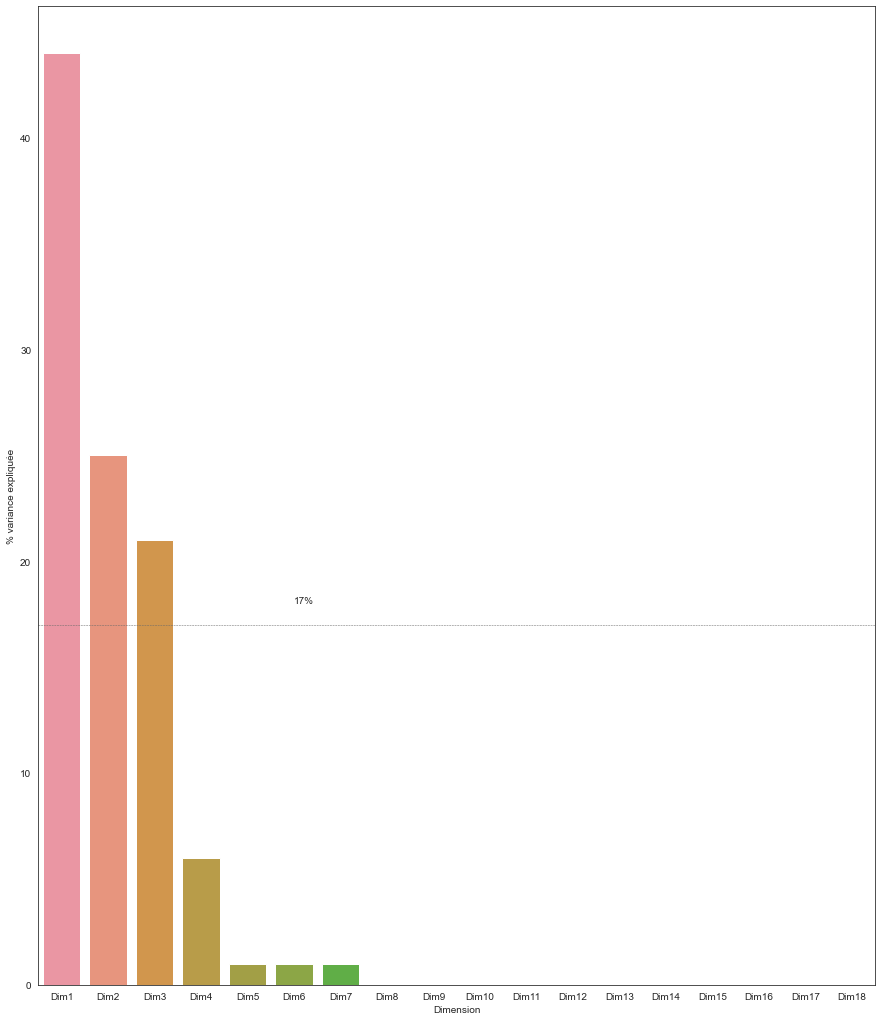

In [87]:
pca = PCA()
pca.fit(df)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(18)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

plt.figure(figsize = (15, 18)) # modifie la taille du graphique
seaborn.barplot(data = eig, x = "Dimension", y = "% variance expliquée")
plt.text(5, 18, "17%")
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show() # cette ligne supprime l'affichage inutile en amont du graphique

[2.44291424 1.58537565 1.23108273 1.14038949 1.06831924 1.02426268
 0.96667539 0.94677311 0.91823202 0.88788045 0.85516528 0.84097802
 0.80379221 0.77543072 0.73517897 0.71499927 0.54265952 0.51994729]
[0.13571703 0.08807615 0.06839327 0.06335477 0.05935088 0.0569033
 0.05370402 0.05259834 0.05101273 0.04932654 0.04750903 0.04672086
 0.04465498 0.04307935 0.04084315 0.03972206 0.03014766 0.02888587]


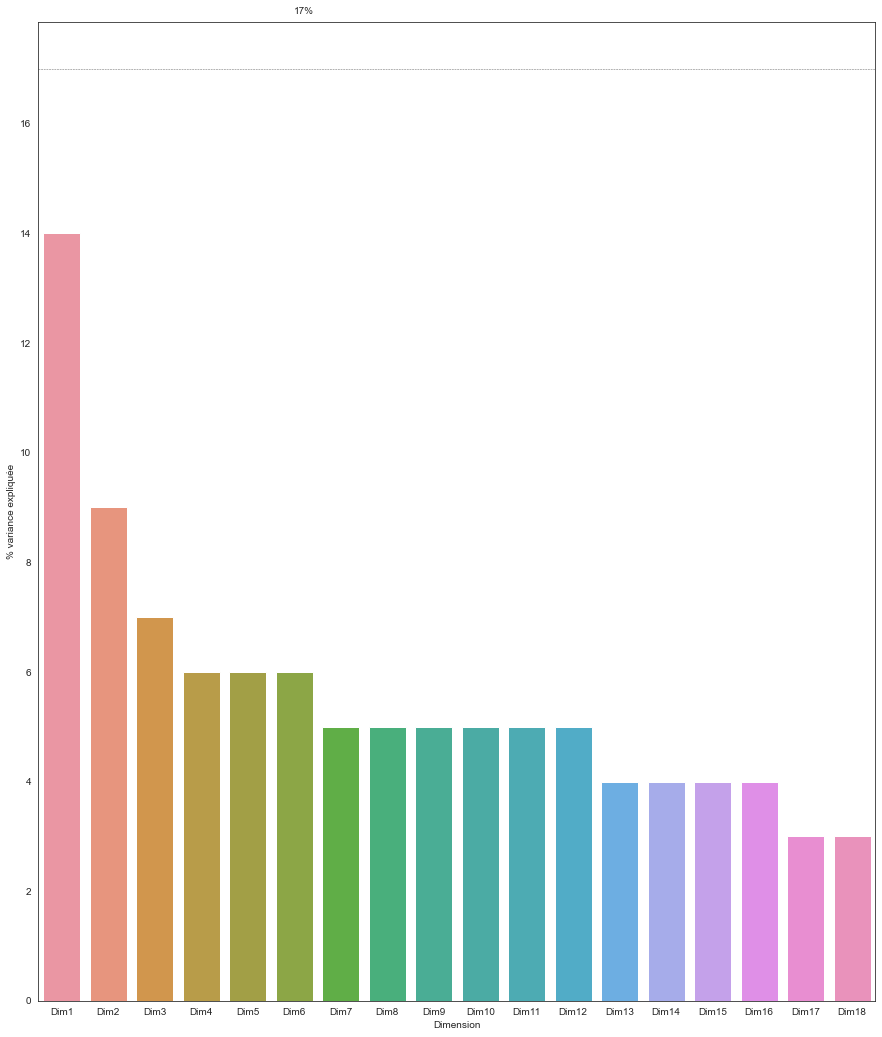

In [88]:
scaled_data = scale(df)
pca = PCA()
pca.fit(scaled_data)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(18)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

plt.figure(figsize = (15, 18)) # modifie la taille du graphique
seaborn.barplot(data = eig, x = "Dimension", y = "% variance expliquée")
plt.text(5, 18, "17%")
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show() # cette ligne supprime l'affichage inutile en amont du graphique

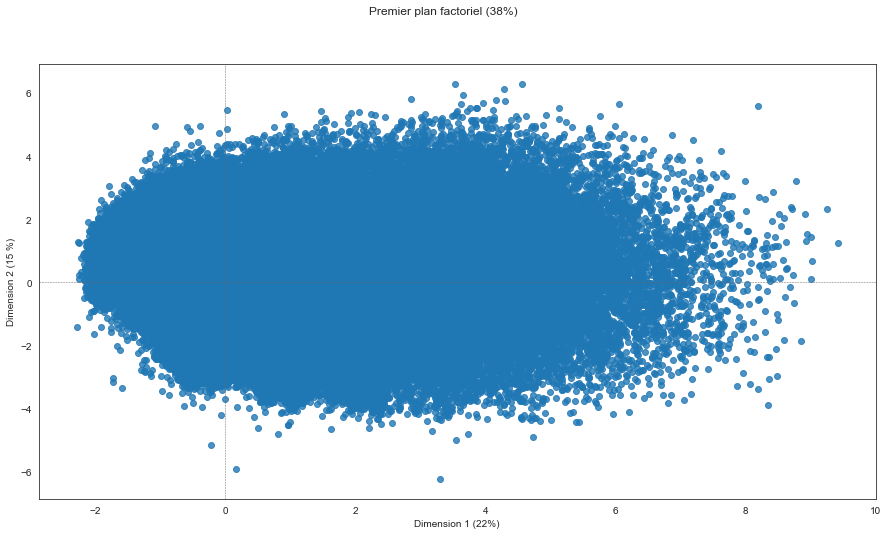

In [89]:
donnees_pca = pca.transform(scaled_data)
donnees_pca_df = pandas.DataFrame({
    "Dim1": donnees_pca[:,0],
    "Dim2": donnees_pca[:,1],
    "Name": df["HeartDisease"]
})
donnees_pca_df.head()

# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots(figsize=(15,8))
plt.axvline(x = 0, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 0, linewidth = .5, color = "dimgray", linestyle = "--")

# l'option ax permet de placer les points et le texte sur le même graphique
seaborn.regplot(data = donnees_pca_df, x = "Dim1", y = "Dim2", fit_reg = False, ax = ax)

plt.xlabel("Dimension 1 (22%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (15 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (38%)") # titre général
plt.show()

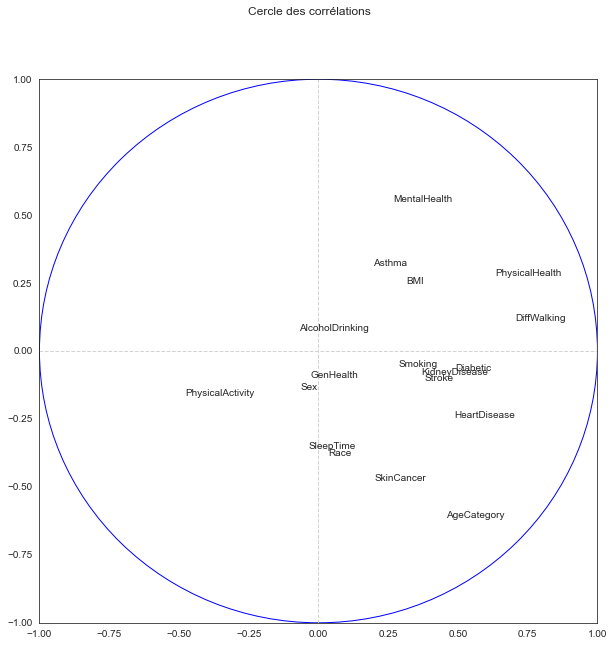

In [90]:
n = scaled_data.shape[0] # nb individus
p = scaled_data.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = numpy.sqrt(eigval) # racine carrée des valeurs propres
corvar = numpy.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pandas.DataFrame({'id': df.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})


# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

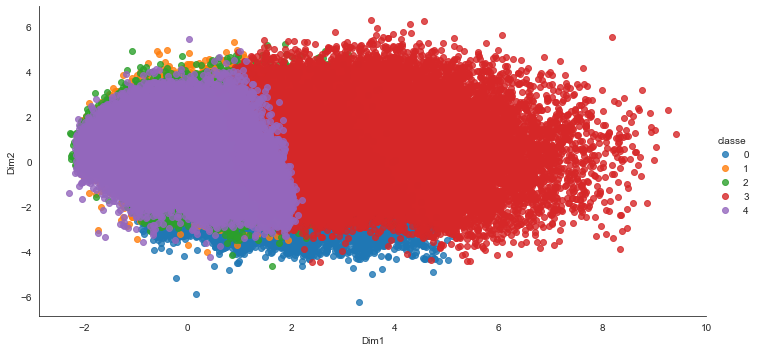

In [91]:
# 7. Trouver la partition des chansons, avec le nombre de classes optimal obtenu ci-dessus

kmeans3 = KMeans(n_clusters = 5)
kmeans3.fit(scaled_data)
pandas.Series(kmeans3.labels_).value_counts()

WGI_k3 = df.assign(classe = kmeans3.labels_)
WGI_k3.groupby("classe").mean()

WGI_pca_k3 = donnees_pca_df.assign(classe = kmeans3.labels_)
seaborn.lmplot(data = WGI_pca_k3, x = "Dim1", y = "Dim2", hue = "classe", 
               fit_reg = False, height = 5, aspect = 2)
plt.show()